**Importing libraries and data**

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import bds

import warnings
warnings.filterwarnings('ignore')

In [2]:
minlyData = pd.read_csv("../../dataset/cleaned.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
dailyData = pd.read_csv("../../dataset/dailyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
weeklyData = pd.read_csv("../../dataset/weeklyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])
monthlyData = pd.read_csv("../../dataset/monthlyData.csv", infer_datetime_format = True,  parse_dates=['DateTime'], index_col = ['DateTime'])


**Decomposing the signal and identifying seaonal period**


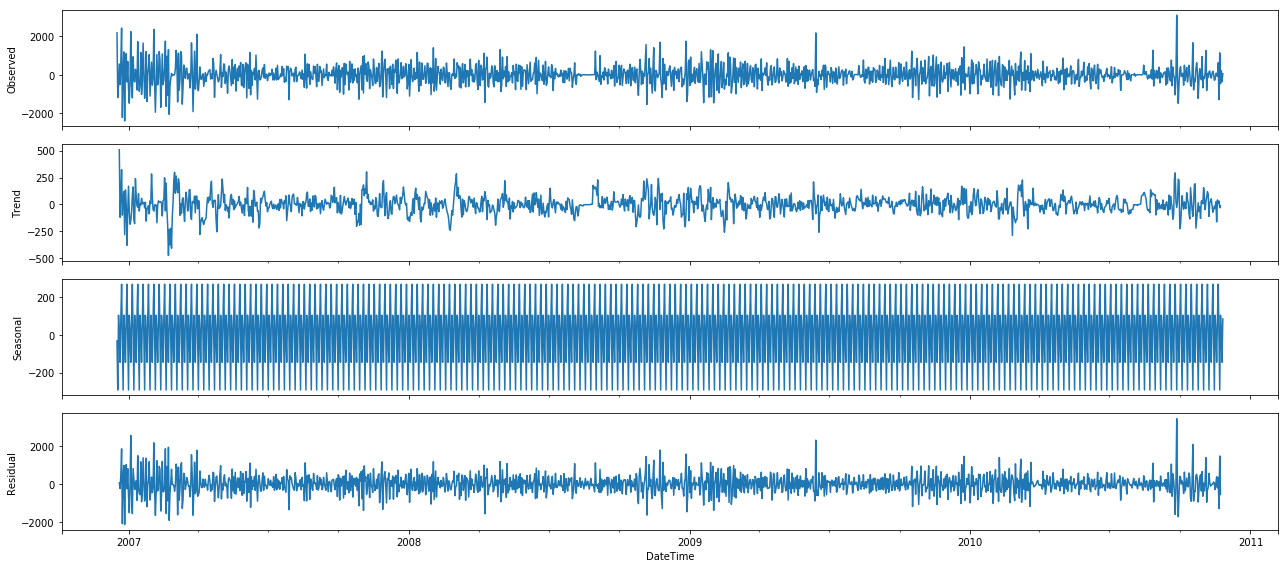

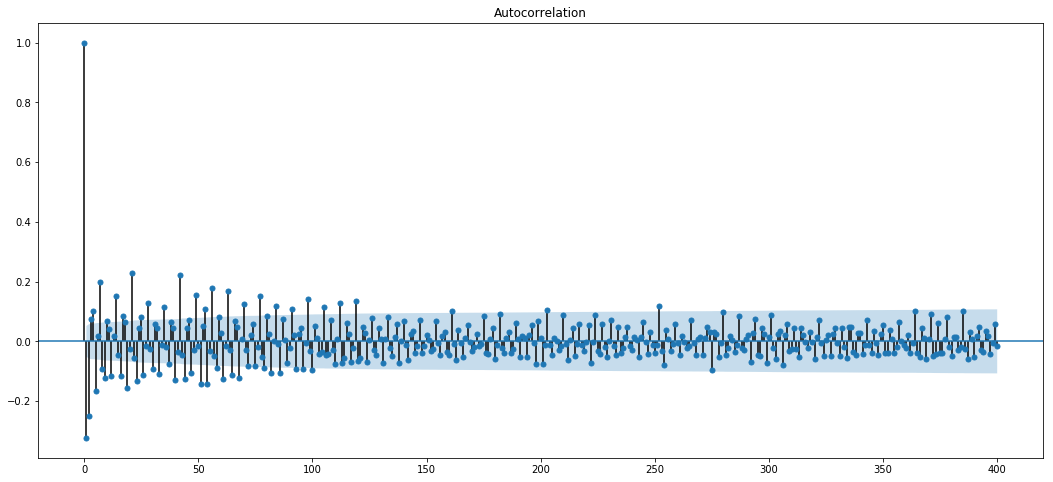

In [3]:

dailyGAP = dailyData['Global_active_power'].diff()[1:] 

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(dailyGAP, model='additive')
fig = decomposition.plot()
plt.show()

dailyACF = plot_acf(dailyGAP, lags=400)

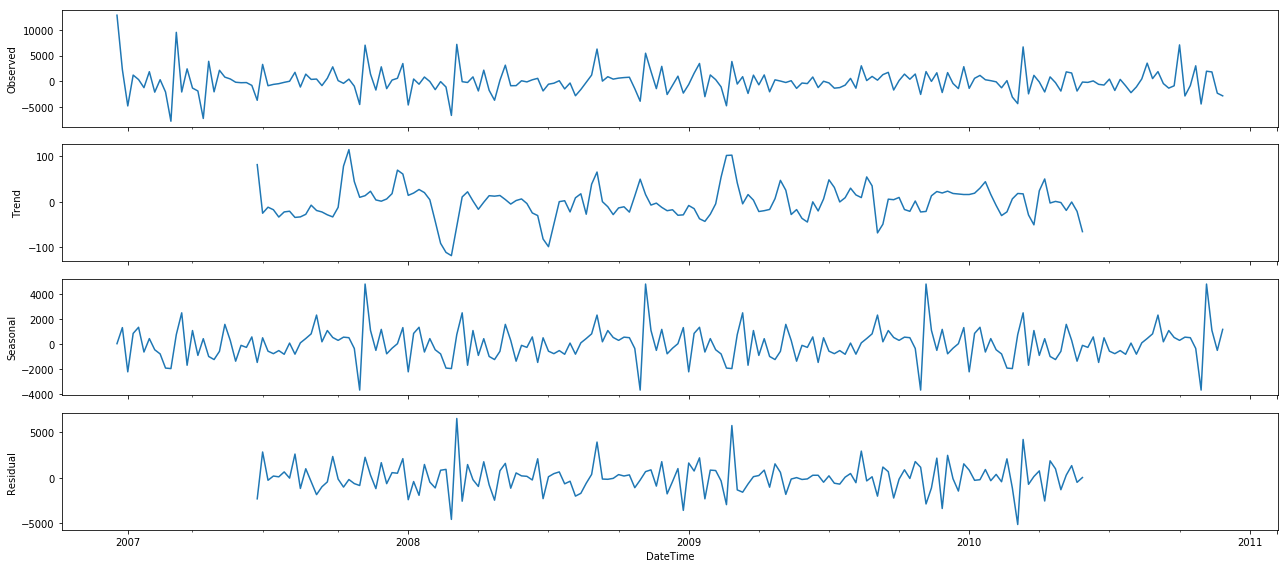

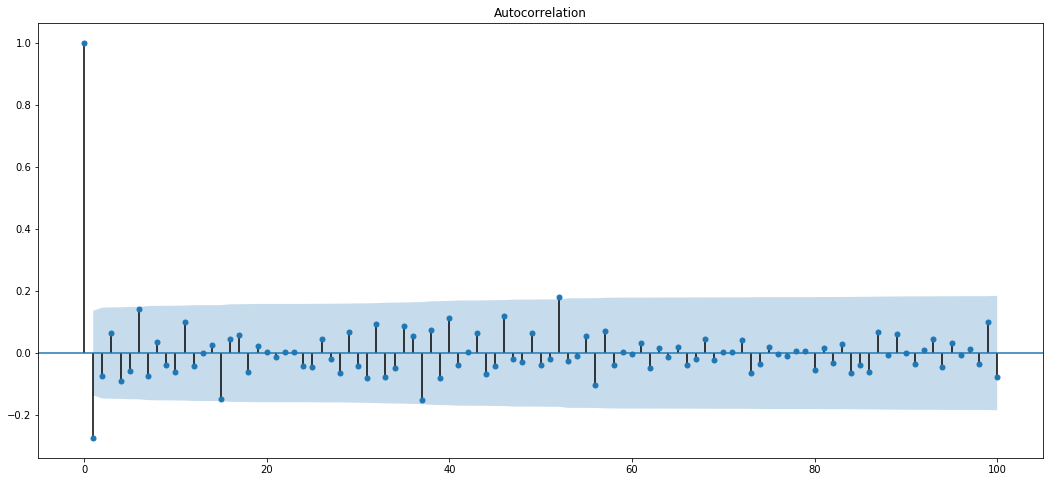

In [4]:

weeklyGAP = weeklyData['Global_active_power'].diff()[1:]

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(weeklyGAP, model='additive')
fig = decomposition.plot()
plt.show()

weeklyACF = plot_acf(weeklyGAP, lags = 100)

**Analysis**
<br>
The data when sampled weekly has as strong seasonal component and non-uniform trend. It also has a residual of high magnitude. This conveys that better methods are needed to predict this time series than AR or MA. ARIMA with a higher order of integration is needed. As differencing is likely to make the series stationary. 

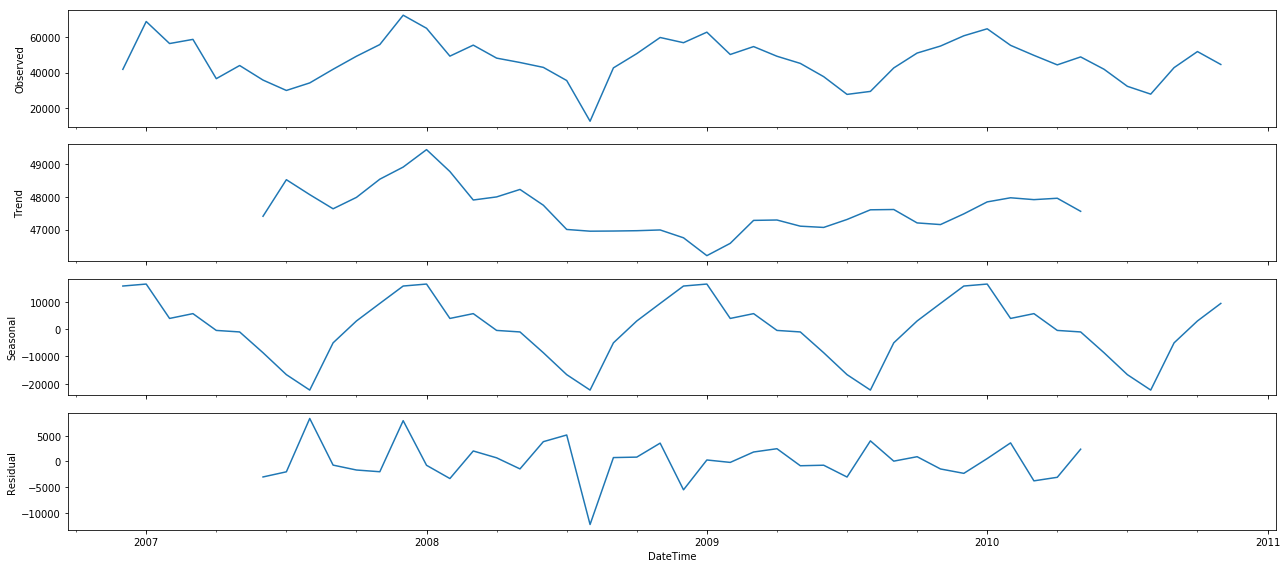

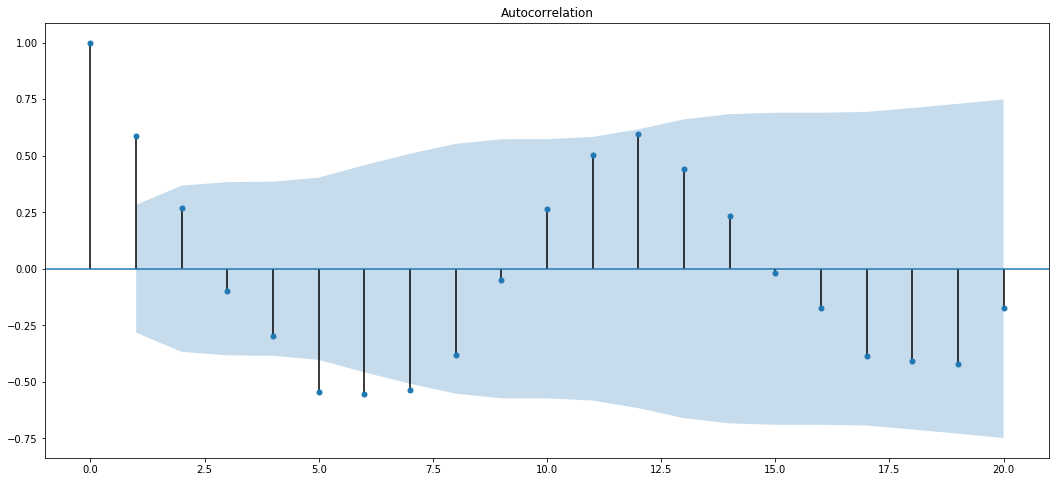

In [5]:

monthlyGAP = monthlyData['Global_active_power']

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(monthlyGAP, model='additive')
fig = decomposition.plot()
plt.show()

monthlyACF = plot_acf(monthlyGAP, lags = 20)

**Performing test for linearity of given data**

In [6]:
# For daily data

bds_stat_daily, pvalue_daily = bds(dailyGAP)
print(pvalue_daily)
if (pvalue_daily < 0.05):
    print("Daily Data is Non Linear")
else:
    print("Daily Data is Linear")

print('')

3.6727329752132416e-29
Daily Data is Non Linear



In [7]:
# For weekly data

bds_stat_weekly, pvalue_weekly = bds(weeklyGAP)
print(pvalue_weekly)
if (pvalue_weekly < 0.05):
    print("Weekly Data is Non Linear")
else:
    print("Weekly Data is Linear")

print('')

7.006922427051028e-05
Weekly Data is Non Linear



In [8]:
# For monthly data

bds_stat_monthly, pvalue_monthly = bds(monthlyGAP)
print(pvalue_monthly)
if (pvalue_monthly < 0.05):
    print("Monthly Data is Non Linear")
else:
    print("Monthly Data is Linear")
    
print('')

9.864127440856745e-07
Monthly Data is Non Linear



**Linearity of data**<br>
The BDS test indicates that the data is non-stationary. This means that a regression model cannot model the non-linear part of the data. Hence it requires the help of a neural network which has the capability to model non-linear data.

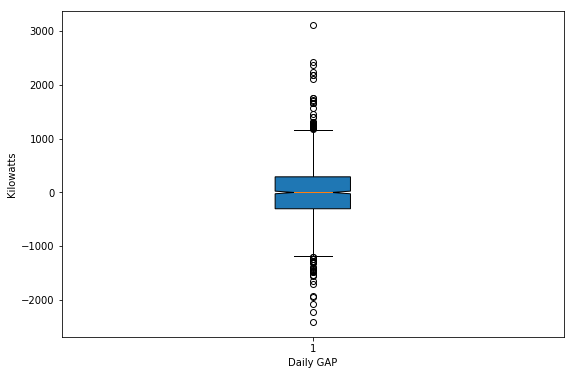

In [10]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(dailyGAP, notch = True, vert = True, patch_artist = True)
plt.xlabel(['Daily GAP'])
plt.ylabel('Kilowatts')
plt.show()

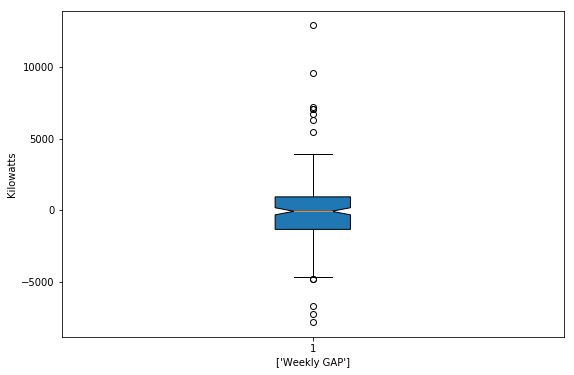

In [12]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(weeklyGAP, notch = True, vert = True, patch_artist = True)
plt.xlabel(['Weekly GAP'])
plt.ylabel('Kilowatts')
plt.show()

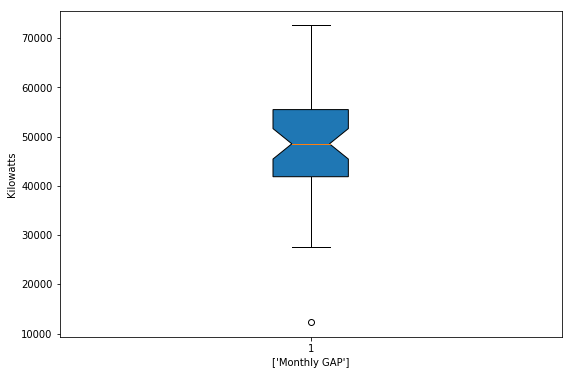

In [13]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(monthlyGAP, notch = True, vert = True, patch_artist = True)
plt.xlabel(['Monthly GAP'])
plt.ylabel('Kilowatts')
plt.show()

# Outlier Analysis
Monthly GAP data has the least number of outliers, whereas daily GAP is filled with outliers. This is indicative of using SARIMA model for monthly data and the LSTM model for daily and weekly GAP. 